# Feature Selection und Grid Search

## Datensatz erzeugen

In [1]:
from sklearn import datasets

In [2]:
x, y = datasets.make_classification(n_samples=100000, n_features=10, n_redundant=0, n_informative=3, random_state=55)

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)

In [5]:
x_train.shape

(75000, 10)

In [6]:
y_train.shape

(75000,)

In [7]:
import numpy as np

np.unique(y_train)

array([0, 1])

## Feature-Selektion auf Grundlage eines Modells

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
model = RandomForestClassifier(n_estimators=5, max_depth=10)

In [10]:
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=5)

In [11]:
model.score(x_train, y_train)

0.9158933333333333

In [12]:
model.score(x_test, y_test)

0.90404

In [13]:
from sklearn.feature_selection import SelectFromModel

In [14]:
selector = SelectFromModel(model)

In [15]:
selector.fit(x_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(max_depth=10, n_estimators=5))

In [16]:
selector.get_support()

array([False, False,  True, False, False, False, False,  True, False,
        True])

In [17]:
features_to_keep = selector.get_support()

In [18]:
x_train[:, features_to_keep].shape

(75000, 3)

In [19]:
small_model = RandomForestClassifier(n_estimators=5, max_depth=10)

In [20]:
small_model.fit(x_train[:, features_to_keep], y_train)

RandomForestClassifier(max_depth=10, n_estimators=5)

In [21]:
small_model.score(x_train[:, features_to_keep], y_train)

0.9298133333333334

In [22]:
small_model.score(x_test[:, features_to_keep], y_test)

0.92124

## Exkurs: Feature Importance in Random Forests

* *scikit-learn*: [Feature importances with a forest of trees](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html)
* *neptune.ai*: [How to Do Model Visualization in Machine Learning? -- Feature Importance Visualization](https://neptune.ai/blog/visualization-in-machine-learning#h-feature-importance-visualization)

## Sequentielle Feature-Selektion

In [23]:
from sklearn.feature_selection import SequentialFeatureSelector

In [24]:
seq_model = RandomForestClassifier(n_estimators=3, max_depth=7)

In [25]:
seq_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=3)

In [26]:
seq_model.score(x_train, y_train)

0.90008

In [27]:
seq_model.score(x_test, y_test)

0.89712

In [28]:
seq_selector_forward = SequentialFeatureSelector(seq_model, direction="forward")

In [29]:
seq_selector_forward.fit(x_train, y_train)

SequentialFeatureSelector(estimator=RandomForestClassifier(max_depth=7,
                                                           n_estimators=3))

In [30]:
seq_selector_forward.get_support()

array([False,  True,  True, False, False, False,  True,  True, False,
        True])

**Aufgabe:** Trainiere ein Modell auf den selektierten Features und vergleiches es mit einem Modell, das auf dem vollen Datensatz trainiert wurde.

In [31]:
small_model_forward = RandomForestClassifier(n_estimators=3, max_depth=7)
small_model_forward.fit(x_train[:, seq_selector_forward.get_support()], y_train)
print("Train:", small_model_forward.score(x_train[:, seq_selector_forward.get_support()], y_train))
print("Test:", small_model_forward.score(x_test[:, seq_selector_forward.get_support()], y_test))

Train: 0.9182266666666666
Test: 0.91556


**Aufgabe:** Wiederhole die sequentielle Feature-Selektion, aber mit `direction="backward"`.

In [32]:
seq_selector_backward = SequentialFeatureSelector(seq_model, direction="backward")
seq_selector_backward.fit(x_train, y_train)

small_model_backward = RandomForestClassifier(n_estimators=3, max_depth=7)
small_model_backward.fit(x_train[:, seq_selector_backward.get_support()], y_train)
print("Train:", small_model_backward.score(x_train[:, seq_selector_backward.get_support()], y_train))
print("Test:", small_model_backward.score(x_test[:, seq_selector_backward.get_support()], y_test))

Train: 0.9089466666666667
Test: 0.9042


**Aufgabe:** Vergleiche jeweils die von den drei Selektions-Verfahren ausgewählten Features. Welche Features sind redundant? Welche Features sind redundant?

In [33]:
selector.get_support()

array([False, False,  True, False, False, False, False,  True, False,
        True])

In [34]:
seq_selector_forward.get_support()

array([False,  True,  True, False, False, False,  True,  True, False,
        True])

In [35]:
seq_selector_backward.get_support()

array([False, False,  True, False,  True, False,  True,  True, False,
        True])

In [36]:
selector.get_support() & seq_selector_forward.get_support() & seq_selector_backward.get_support()

array([False, False,  True, False, False, False, False,  True, False,
        True])

In [37]:
selector.get_support() | seq_selector_forward.get_support() | seq_selector_backward.get_support()

array([False,  True,  True, False,  True, False,  True,  True, False,
        True])

## Grid Search

In [38]:
parameters = {"n_estimators": [3, 9, 18], "max_depth": [4, 8, 16]}

**Aufgabe:** Trainiere für jede Parameter-Kombination ein Modell auf dem im vorherigen Abschnitt ermittelten optimalen Feature-Set und speichere den Score in einem Dictionary. Welche Kombination ergibt das beste Ergebnis?

In [39]:
model_params = {}
for n_estimators in parameters["n_estimators"]:
    for max_depth in parameters["max_depth"]:
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
        model.fit(x_train[:, selector.get_support()], y_train)
        model_params[(n_estimators, max_depth)] = model.score(x_test[:, selector.get_support()], y_test)

**Aufgabe:** Welcher Parameterbereich sollte näher untersucht werden?

In [40]:
model_params

{(3, 4): 0.87684,
 (3, 8): 0.9132,
 (3, 16): 0.91368,
 (9, 4): 0.87988,
 (9, 8): 0.91872,
 (9, 16): 0.9194,
 (18, 4): 0.88448,
 (18, 8): 0.91816,
 (18, 16): 0.91964}

In [41]:
n_est = [key[0] for key in model_params.keys()]

In [42]:
max_dp = [key[1] for key in model_params.keys()]

In [43]:
scores = list(model_params.values())

In [44]:
import matplotlib.pyplot as plt

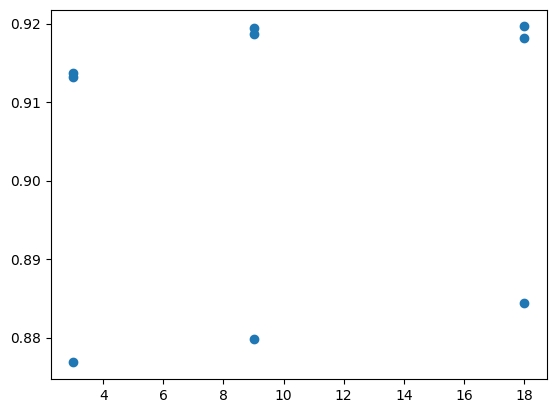

In [45]:
plt.scatter(n_est, scores)

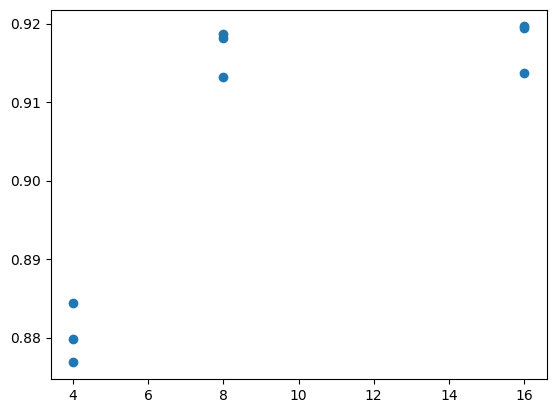

In [46]:
plt.scatter(max_dp, scores)

**Aufgabe:** Wiederhole die Grid Search in diesem Parameter-Bereich.

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
parameters = {"n_estimators": [50, 100, 250], "max_depth": [12, 16, 25, 50]}

In [49]:
grid_search = GridSearchCV(RandomForestClassifier(), parameters)

In [50]:
grid_search.fit(x_train[:, selector.get_support()], y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [12, 16, 25, 50],
                         'n_estimators': [50, 100, 250]})

In [51]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=12, n_estimators=250)